<font size="6">Lesson 4: Overfitting and Underfitting</font>

Readings:
- [Chapter 5.2](http://www.deeplearningbook.org/)
- [L1/L2 regularization](https://medium.com/@pavanmeduri1_55193/l1-l2-regularization-409039dd111a)

- import what you need

In [1]:
# import what you need
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from implements_04.functions_04 import *

<font size="5">Overviews</font>
1. Introduction
1. Flow
1. Underfitting
1. Overfitting
1. Regularization
1. Summary

---

# Introduction
In this notebook, we want to explain **Underfitting** and **Overfitting**. As [this renowned book](http://www.deeplearningbook.org/contents/ml.html) says, 
> Underfitting: the model is not able to obtain a sufficiently low error value on the training set \
> Overfitting: the gap between the training error and test error is too large

In other words, underfitting is not enough to be optimized on the training data, and overfitting is the model learned on the training dataset in an unexpected way. I will explain the detail in its section. In this notebook, I'll show the shorten code, so if you want to know the full code, please visit `implements_04/functions_04.py`

---
# Flow
First of all, I'm going to explain how I trained/processed the model.

## Data
I assumed the training data generated by the distribution based on $y=x^2$, and there's no noise in it.
$$
y = x^2
$$

Text(0, 0.5, 'y')

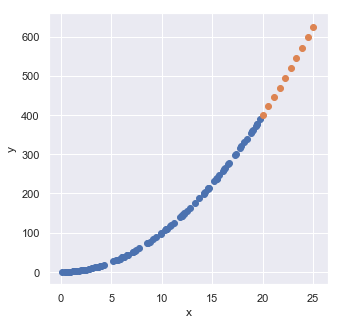

In [2]:
# data preparation
x, y, x_test, y_test = data_generator(num=100, test_num=10)

# data visualization
plt.figure(figsize=(5, 5))
plt.scatter(x, y)
plt.scatter(x_test, y_test)
plt.xlabel("x")
plt.ylabel("y")

## Polynomial Regression
In this experiment, mean squared error (MSE) is employed as a loss function, and it is defined as:
$$
MSE(y_{pred}, y_{true}) = \sqrt{\frac{1}{n}\sum_{l=1}^n (y_{pred}-y_{true})^2}
$$

Where $n$ is \# of data, $y_{pred}$ is predicted output "y", $y_{true}$ is given(true) output "y".

<img src="implements_04/image/MSE.jpg" width="500">

---

Linear regression is the simplest model for machine learning. y is predicted using formula below:
$$
y_{pred} = a_0 + a_1x
$$

Where $a_i$ is a trainable coefficient and $x$ is a valuable.

---

In this notebook, I included polynomial regression as well. y is predicted using formula below:

$$
y_{pred} = \sum_{l=0}^n a_l x^l \\
y_{pred} = a_0 + a_1x + a_2x^2 + a_3x^3 .... + a_nx^n
$$

Where $n$ is degree and indicates the complexity(ability) of the model.

In [3]:
#--- parameter ---#
degree = 10 # degree of polynomial fuction, complexity of the model.
#-----------------#

# Define model
pf = PolynomialFeatures(degree=degree, include_bias=False)
model = LinearRegression()

# train the model on the training dataset
x_ = pf.fit_transform(x)
model.fit(x_, y)
print()

In [4]:
# observe the error on the training set
print()
x_ = pf.fit_transform(x)
y_pred = model.predict(x_)
print(f"train loss: {mse(y_pred, y)}")

print()
# observe the error on the test set
x_ = pf.fit_transform(x_test)
y_pred = model.predict(x_)
print(f"test loss: {mse(y_pred, y_test)}")


train loss: 2.351030001128903e-08

test loss: 3.948477009472857e-06


In [5]:
# observe the coefficient of the predicted fuction
print()
data = []
line = np.reshape(np.linspace(0, x.max()+1, 100), (100, 1))
y_predict = f(line, model)
y_true = f_true(line)

coef = np.reshape(model.coef_.reshape(-1), (1, -1))
for i in range(coef.shape[1]):
    print(f"coefficient {i+1} = {coef[0,i]}")


coefficient 1 = 2.1564165158213276e-05
coefficient 2 = 1.0000024922803645
coefficient 3 = -3.890757599767959e-07
coefficient 4 = 7.479349531207269e-08
coefficient 5 = -1.0222926550423894e-08
coefficient 6 = 7.487503273645446e-10
coefficient 7 = -3.2820310271602926e-11
coefficient 8 = 8.115656855312708e-13
coefficient 9 = -9.036928657444481e-15
coefficient 10 = -6.73644641206855e-18


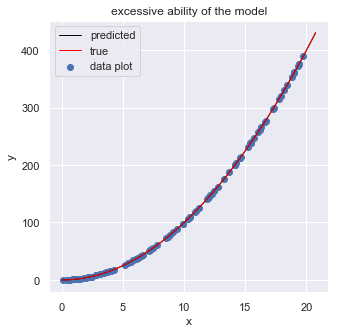

In [6]:
# visualization of the predicted and true function
plt.figure(figsize=(5, 5))
plt.scatter(x, y, label="data plot")
plt.plot(line, y_predict, c="black", label="predicted", linewidth=1)
plt.plot(line, y_true, c="red", label="true", linewidth=1)
plt.title("excessive ability of the model")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

---

# Underfitting
This problem is very simple, the determined model doesn't have enough complexity/capability to solve a certain problem. The example of underfitting is shown below. Where the blue plot is the training dataset and the black line is predicted function. It is obvious that the predicted function couldn't represent the training data and the reason is lack of the ability of the model (linear model).

<img src="implements_04/image/underfitting.png">

In [7]:
# define parameters
training_num = 100
degree = 1 # 1 means linear regression

# data generation
x, y, x_test, y_test = data_generator(training_num)

# model prediction
model, pf = predict_polyreg(x, y, degree)

# get errors
train_error, test_error = get_errors(pf, model, x, y, x_test, y_test)
print(f"train error: {train_error}")
print(f"test error : {test_error}")

train error: 870.493145453068
test error : 18657.97678363845


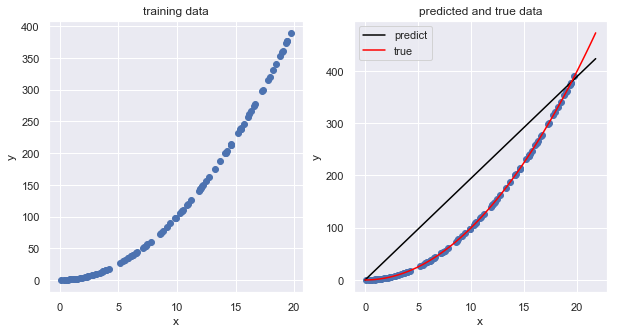

In [8]:
line = np.reshape(np.linspace(0, x.max()+2, 100), (100, 1))
y_predict = f(line, model)
y_true = f_true(line)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(x, y)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("training data")
ax = fig.add_subplot(1, 2, 2)
ax.scatter(x, y)
ax.plot(line, y_predict, c="black", label="predict")
ax.plot(line, y_true, c="red", label="true")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("predicted and true data")
plt.legend()

---

---> as you can see, by using linear regression, you cannot train properly.

---

# Overfitting
The main purpose of machine learning is to predict unknown data from only existing data (data you have). In other words, we only have the access to the training data. It causes the model to have learnt features from the training data that are specific to it. It is called **Overfitting** in this field, in Japanese we call it "過学習" and it is kind of "深読み" or "偏見" for our real world.

There are two factors that lead to Overfitting as follows:
1. lack of the number of training data
2. the complexity of the model is too high compared to the complexity of the training set. ("the complexity of the model" = "how smart the model is")
        
There are three ways to prevent overfitting:        
1. Prepare much training data as possible.
2. Prepare the model whose capacity fits the complexity of the data.
3. Employ Regularization
        
<img src="implements_04/image/overfitting_dataset.png"> <img src="implements_04/image/overfitting_capacity.png">

## Prepare Much Training Data as Possible

### lack of training data

In [9]:
# define parameters
training_num = 5
degree = 8

# data generation
x, y, x_test, y_test = data_generator(training_num)

# model prediction
model, pf = predict_polyreg(x, y, degree)

# get errors
train_error, test_error = get_errors(pf, model, x, y, x_test, y_test)
print(f"train error: {train_error}")
print(f"test error : {test_error}")

train error: 2.6391423625703093e-22
test error : 40054750.4396651


In [10]:
coef_visualizer(model)

coefficient 1 = 1.1354872103836389e-05
coefficient 2 = 0.00010244744971897075
coefficient 3 = 0.0006543689837784047
coefficient 4 = 0.0031727240180057133
coefficient 5 = 0.009435267575537452
coefficient 6 = -0.0017050880140242776
coefficient 7 = 0.00010413895106125853
coefficient 8 = -2.1370853278761815e-06


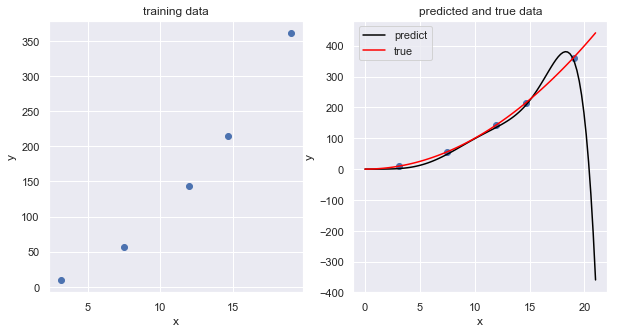

In [11]:
line = np.reshape(np.linspace(0, x.max()+2, 100), (100, 1))
y_predict = f(line, model)
y_true = f_true(line)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(x, y)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("training data")
ax = fig.add_subplot(1, 2, 2)
ax.scatter(x, y)
ax.plot(line, y_predict, c="black", label="predict")
ax.plot(line, y_true, c="red", label="true")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("predicted and true data")
plt.legend()

---

--> the train loss is very low and the test loss is very high. \
--> it means the model is overfitting as the definition. \
--> there are wide range of the coefs that work properly on "training set", because the training set has only 5 plots. \
--> so the model chose the coefs that reduce the train loss as possible.

---

### Plentiful training data

In [12]:
# define parameters
training_num = 100
degree = 8

# data generation
x, y, x_test, y_test = data_generator(training_num)

# model prediction
model, pf = predict_polyreg(x, y, degree)

# get errors
train_error, test_error = get_errors(pf, model, x, y, x_test, y_test)
print(f"train error: {train_error}")
print(f"test error : {test_error}")

train error: 3.812566258006176e-13
test error : 2.1743643139681884e-13


In [13]:
coef_visualizer(model)

coefficient 1 = 4.881368786957552e-08
coefficient 2 = 1.000000042162546
coefficient 3 = -4.660783203824792e-09
coefficient 4 = 1.623766121561232e-10
coefficient 5 = 1.55738616447465e-12
coefficient 6 = -3.361998179851611e-13
coefficient 7 = 1.3030944595940341e-14
coefficient 8 = -2.011978535436821e-16


---
---> coefficient 2 indicates the coef of the $x^2$, and it was nearly 1 and the others result in 0.\
---> it means the model could train successfully.
---

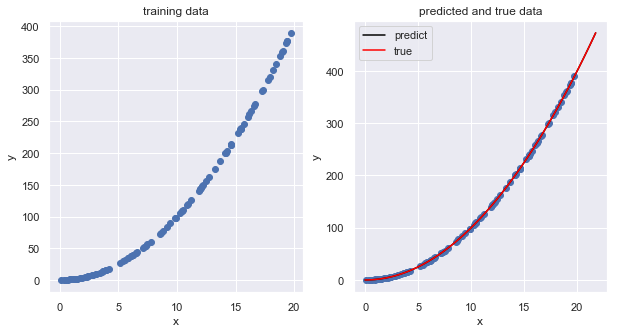

In [14]:
line = np.reshape(np.linspace(0, x.max()+2, 100), (100, 1))
y_predict = f(line, model)
y_true = f_true(line)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(x, y)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("training data")
ax = fig.add_subplot(1, 2, 2)
ax.scatter(x, y)
ax.plot(line, y_predict, c="black", label="predict")
ax.plot(line, y_true, c="red", label="true")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("predicted and true data")
plt.legend()

---

--> even if the model has the same complexity as the previous model. \
--> this model could train properly. \
--> the model wouln't choose kind of the previous model's coefs.

---

## Prepare the model whose capacity fits the complexity of the data.
- to prevent overfitting, using the model with lower complexity is also important.

### the model with high capacity

In [15]:
# define parameters
training_num = 10000
degree = 15

# data generation
x, y, x_test, y_test = data_generator(training_num)

# model prediction
model, pf = predict_polyreg(x, y, degree)

# get errors
train_error, test_error = get_errors(pf, model, x, y, x_test, y_test)
print(f"train error: {train_error}")
print(f"test error : {test_error}")

train error: 11.747403306280077
test error : 40041208053.632576


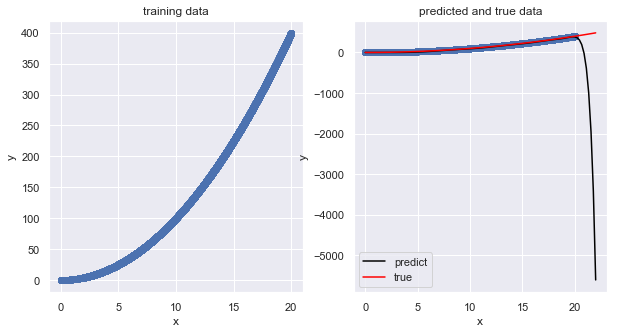

In [16]:
line = np.reshape(np.linspace(0, x.max()+2, 100), (100, 1))
y_predict = f(line, model)
y_true = f_true(line)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(x, y)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("training data")
ax = fig.add_subplot(1, 2, 2)
ax.scatter(x, y)
ax.plot(line, y_predict, c="black", label="predict")
ax.plot(line, y_true, c="red", label="true")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("predicted and true data")
plt.legend()

---

---> overfitting occurs. \
---> this model's problem is almost same as previous section. \
---> choosing the model with high capacity means increasing the coefs that is plausible for the training set.\
---> so the model chose the coefs that reduce the train loss as possible.

---

### the model with low capacity

In [17]:
# define parameters
training_num = 10000
degree = 5

# data generation
x, y, x_test, y_test = data_generator(training_num)

# model prediction
model, pf = predict_polyreg(x, y, degree)

# get errors
train_error, test_error = get_errors(pf, model, x, y, x_test, y_test)
print(f"train error: {train_error}")
print(f"test error : {test_error}")

train error: 1.310639424121087e-19
test error : 2.65711144289252e-19


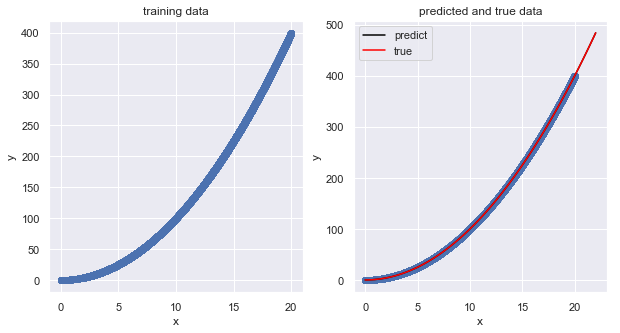

In [18]:
line = np.reshape(np.linspace(0, x.max()+2, 100), (100, 1))
y_predict = f(line, model)
y_true = f_true(line)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(x, y)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("training data")
ax = fig.add_subplot(1, 2, 2)
ax.scatter(x, y)
ax.plot(line, y_predict, c="black", label="predict")
ax.plot(line, y_true, c="red", label="true")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("predicted and true data")
plt.legend()

---

--> using the model with lower capacity works properly to prevent overfitting

---

# Regularization
In reality, we can't determine the complexity of the training set prefectly. In this case, you can use a regularization for the purpose of restriction of the complexity of the model. The one of the ways to do it is restricting the weight(parameter, coef) of the model to small.

<img src="implements_04/image/L1L2_regularization.png">

- [reference of this image](https://medium.com/@pavanmeduri1_55193/l1-l2-regularization-409039dd111a)

In [19]:
from sklearn.linear_model import Ridge, Lasso

## Ridge Regression (L2 regularization)
In this model, restriction of the weight-squared is employed. The loss function will be:
$$
loss = MSE(y_{pred}, y_{true}) + \alpha |\text{W}|^2
$$
Where $\text{W}$ is the weight of the model, and $\alpha$ controlls the level of regularization

In [20]:
# define parameters
training_num = 10000
degree = 13

# data generation
x, y, x_test, y_test = data_generator(training_num)

# model prediction
linear_model, linear_pf = predict_polyreg(x, y, degree)
pf = PolynomialFeatures(degree=degree, include_bias=False)
model = Ridge(alpha=1, random_state=42) # Ridge model
x_ = pf.fit_transform(x)
model.fit(x_, y)

# get errors
train_error, test_error = get_errors(linear_pf, linear_model, x, y, x_test, y_test)
print(f"Linear: train error: {train_error}")
print(f"Linear: test  error: {test_error}")
print("")
train_error, test_error = get_errors(pf, model, x, y, x_test, y_test)
print(f"Ridge : train error: {train_error}")
print(f"Ridge : test  error: {test_error}")

Linear: train error: 0.2279798955061734
Linear: test  error: 176321491.83215305

Ridge : train error: 0.45246777785973163
Ridge : test  error: 49778.99613013315


In [21]:
print("- coefficient of the original model")
coef_visualizer(linear_model)
print()
print("- coefficient of the model with regularization")
coef_visualizer(model)

- coefficient of the original model
coefficient 1 = 0.003328455367096629
coefficient 2 = 0.013592667771363351
coefficient 3 = 0.03456567413514445
coefficient 4 = 0.06815142846476858
coefficient 5 = 0.06522096725635218
coefficient 6 = -0.04567078073253584
coefficient 7 = 0.011933826252200285
coefficient 8 = -0.0017303276147492715
coefficient 9 = 0.00015457985244402386
coefficient 10 = -8.736845813430344e-06
coefficient 11 = 3.052806134428182e-07
coefficient 12 = -6.030845181132093e-09
coefficient 13 = 5.158465123449001e-11

- coefficient of the model with regularization
coefficient 1 = -0.025704331740623327
coefficient 2 = 0.2958665624317572
coefficient 3 = 0.7137641577809335
coefficient 4 = -0.34622367237552454
coefficient 5 = 0.10107101402475148
coefficient 6 = -0.0193857889162037
coefficient 7 = 0.0025459177669766627
coefficient 8 = -0.00023291548673215804
coefficient 9 = 1.4835438757355458e-05
coefficient 10 = -6.45130595136349e-07
coefficient 11 = 1.826236727925982e-08
coefficient 

---

---> this loss function tends to make the weights smaller.

---

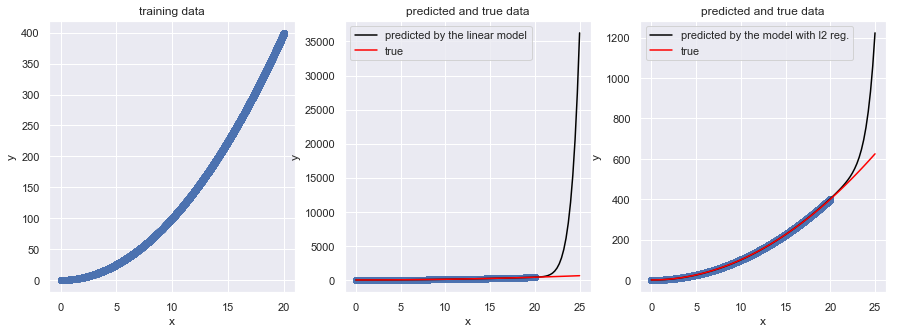

In [22]:
data = []
line = np.reshape(np.linspace(0, x.max()+5, 100), (100, 1))
linear_predict = f(line, linear_model)
y_predict = f(line, model)
y_true = f_true(line)

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 3, 1)
ax.scatter(x, y)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("training data")
ax = fig.add_subplot(1, 3, 2)
ax.scatter(x, y)
ax.plot(line, linear_predict, c="black", label="predicted by the linear model")
ax.plot(line, y_true, c="red", label="true")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("predicted and true data")
plt.legend()
ax = fig.add_subplot(1, 3, 3)
ax.scatter(x, y)
ax.plot(line, y_predict, c="black", label="predicted by the model with l2 reg.")
ax.plot(line, y_true, c="red", label="true")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("predicted and true data")
plt.legend()

## Lasso Regression (L1 regularization)
In this model, restriction of the weight's norm is employed. The loss function will be:
$$
loss = MSE(y_{pred}, y_{true}) + \alpha |\text{W}|
$$
Where $\text{W}$ is the weight of the model, and $\alpha$ controlls the level of regularization

In [23]:
# define parameters
training_num = 100
degree = 13

# data generation
x, y, x_test, y_test = data_generator(training_num)

# model prediction
linear_model, linear_pf = predict_polyreg(x, y, degree)
pf = PolynomialFeatures(degree=degree, include_bias=False)
model = Lasso(alpha=10, random_state=42)
x_ = pf.fit_transform(x)
model.fit(x_, y)

# get errors
train_error, test_error = get_errors(linear_pf, linear_model, x, y, x_test, y_test)
print(f"Linear: train error: {train_error}")
print(f"Linear: test  error: {test_error}")
print("")
train_error, test_error = get_errors(pf, model, x, y, x_test, y_test)
print(f"Lasso : train error: {train_error}")
print(f"Lasso : test  error: {test_error}")

Linear: train error: 0.220936404060441
Linear: test  error: 316454564.22254574

Lasso : train error: 28289.73792032367
Lasso : test  error: 16936.769273697446


In [24]:
print("- coefficient of the original model")
coef_visualizer(linear_model)
print()
print("- coefficient of the model with regularization")
coef_visualizer(model)

- coefficient of the original model
coefficient 1 = 0.003997065280658242
coefficient 2 = 0.010886949574365045
coefficient 3 = 0.03937825498601921
coefficient 4 = 0.07501764828693087
coefficient 5 = 0.06880854664245235
coefficient 6 = -0.04999437757119601
coefficient 7 = 0.01333462021953241
coefficient 8 = -0.0019642480004547266
coefficient 9 = 0.00017781650911014512
coefficient 10 = -1.0167262475663187e-05
coefficient 11 = 3.58987324955496e-07
coefficient 12 = -7.16026715721713e-09
coefficient 13 = 6.1798497505038e-11

- coefficient of the model with regularization
coefficient 1 = 0.0
coefficient 2 = 0.8503269144196907
coefficient 3 = 0.01743334791766623
coefficient 4 = -0.00034306378959386496
coefficient 5 = -1.0271301099801019e-05
coefficient 6 = -1.7759781940764872e-07
coefficient 7 = -9.5644613881095e-10
coefficient 8 = 1.2538821180174238e-10
coefficient 9 = 9.115174260906894e-12
coefficient 10 = 4.492867456462725e-13
coefficient 11 = 1.855231767519369e-14
coefficient 12 = 6.568995

---

---> this tends to replace 0 on some weight parameters instead of reduce the norm of the parameter. \
---> "feature selection"

---

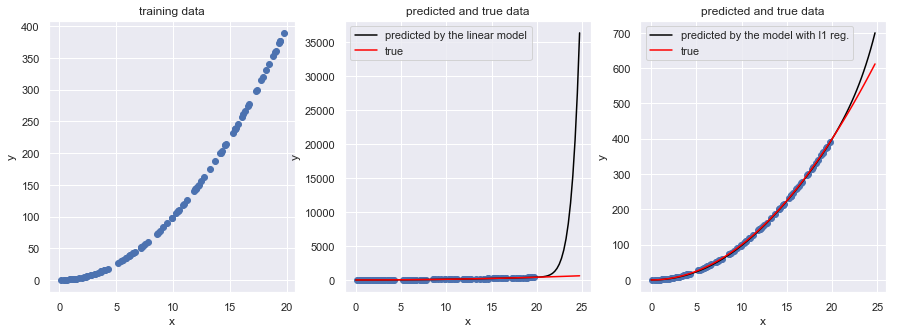

In [25]:
data = []
line = np.reshape(np.linspace(0, x.max()+5, 100), (100, 1))
linear_predict = f(line, linear_model)
y_predict = f(line, model)
y_true = f_true(line)

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 3, 1)
ax.scatter(x, y)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("training data")
ax = fig.add_subplot(1, 3, 2)
ax.scatter(x, y)
ax.plot(line, linear_predict, c="black", label="predicted by the linear model")
ax.plot(line, y_true, c="red", label="true")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("predicted and true data")
plt.legend()
ax = fig.add_subplot(1, 3, 3)
ax.scatter(x, y)
ax.plot(line, y_predict, c="black", label="predicted by the model with l1 reg.")
ax.plot(line, y_true, c="red", label="true")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("predicted and true data")
plt.legend()

---

---> it seems to have better result in Lasso in this training set\
---> it is because this training set is sampled by $y=x^2$ so that it originally has an only one coef.\
---> thats why eliminating the weights is superior to reducing the weight-norm.

---

# Summary

I have demonstrated the some problems of the machine learning, underfitting and overfitting. As a result, the important ways of preventing those problems are as follows:
1. using big training dataset as possible.
2. using the model with moderate complexity.
3. using regularization

I only used two regularization, but there are lots of regularization as well.